In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

## Bitcoin

In [2]:
# Load CSV File
df = pd.read_csv('Bitcoin Historical Data.csv')
print(df)
df.describe()

           Date      Price       Open       High        Low    Vol. Change %
0      6/1/2024  67,760.80  67,533.90  67,861.00  67,449.60  19.01K    0.34%
1     5/31/2024  67,530.10  68,352.30  69,018.20  66,676.80  61.51K   -1.21%
2     5/30/2024  68,354.70  67,631.30  69,504.70  67,138.40  66.84K    1.06%
3     5/29/2024  67,635.80  68,366.20  68,897.60  67,143.20  52.13K   -1.07%
4     5/28/2024  68,366.00  69,428.30  69,560.70  67,299.90  71.39K   -1.53%
...         ...        ...        ...        ...        ...     ...      ...
4106   3/5/2013       40.3       36.2       40.7       36.2  85.43K   11.56%
4107   3/4/2013       36.2       34.5       36.7       34.2  46.77K    4.78%
4108   3/3/2013       34.5       34.3       34.5       33.8  12.53K    0.73%
4109   3/2/2013       34.3       34.5       34.8       33.2  36.66K   -0.72%
4110   3/1/2013       34.5       33.4       34.9       32.9  39.79K    3.36%

[4111 rows x 7 columns]


,Date,Price,Open,High,Low,Vol.,Change %
count,4111,4111,4111,4111,4111,4111,4111
unique,4111,3926,3919,3913,3921,3767,1411
top,6/1/2024,238.9,238.9,138,585.4,1.05M,0.00%
freq,1,4,4,4,4,6,17


In [3]:
df_reversed = df.iloc[::-1].reset_index(drop=True)
df['Date'] = pd.to_datetime(df_reversed['Date'])
df1 = df_reversed['Price']
df1 = df1.str.replace(',', '').astype(float)
df1

0          34.5
1          34.3
2          34.5
3          36.2
4          40.3
         ...   
4106    68366.0
4107    67635.8
4108    68354.7
4109    67530.1
4110    67760.8
Name: Price, Length: 4111, dtype: float64

In [4]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
# Split Train and Test Data
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
# Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# Reshape Input to Fit RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# Define RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\LearnPython\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Fit Model with Training Data
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0021
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8042e-04
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2595e-04
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4489e-04
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8214e-05
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9588e-05
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7128e-05
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7211e-05
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4520e-05
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8807e-05 
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5854e-05
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0407e-05 
Epoch 13/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4180e-05
Epoch 14/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0790e-05
Epoch 15/100
44/

In [10]:
# Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [11]:
# Inverse Transform Predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [12]:
# Forecast Next 30 Days
last_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(last_input)
temp_input = temp_input[0].tolist()

lst_output = []
i = 0
while i < 30:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = last_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [13]:
# Assuming 'lst_output' contains your 30-day forecast
forecast_days = 30
forecast_output = scaler.inverse_transform(lst_output)

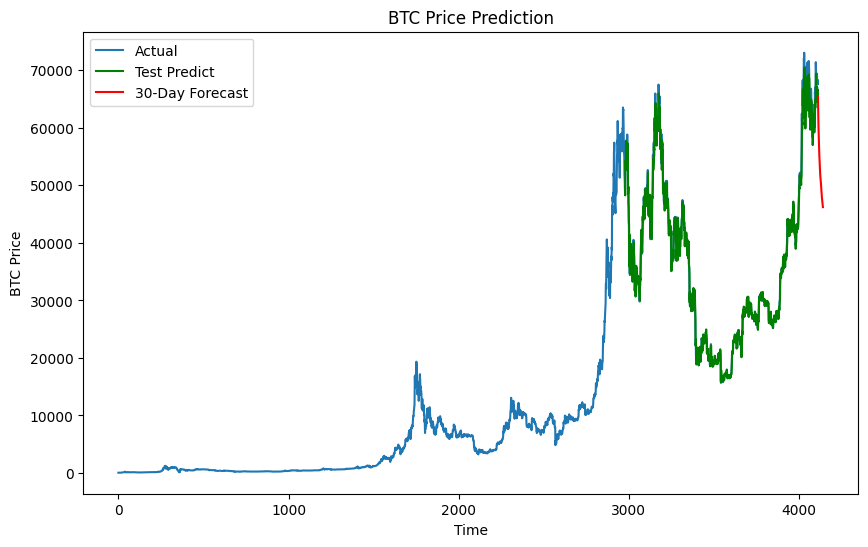

In [14]:
# Plot Results with Train and Test Predictions

plt.figure(figsize=(10, 6))

# Plot entire dataset
plt.plot(scaler.inverse_transform(df1), label='Actual')

# Plot training predictions
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Plot test predictions
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(test_predict_plot, label='Test Predict', color='green')

# Plot 30-day forecast
forecast_days = 30
forecast_output = scaler.inverse_transform(lst_output)
plt.plot(np.arange(len(df1), len(df1) + forecast_days), forecast_output, label='30-Day Forecast', color='red')

# Adding legends and labels
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Huber loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss)

# Inverse transform the actual test labels
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print('Testing RMSE:', test_rmse)

# Compute MAE
test_mae = mean_absolute_error(y_test_actual, test_predict)
print('Testing MAE:', test_mae)

# Compute MAPE
test_mape = mean_absolute_percentage_error(y_test_actual, test_predict)
print('Testing MAPE:', test_mape)

# Compute Huber Loss
delta = 1.0  # You can adjust the delta parameter
test_huber_loss = np.mean(huber_loss(y_test_actual, test_predict, delta))
print('Testing Huber Loss:', test_huber_loss)

Testing RMSE: 1471.058581789454
Testing MAE: 960.7330812486209
Testing MAPE: 2.4526327888843737
Testing Huber Loss: 960.2330812486209


## NASDAQ

In [16]:
# Load CSV File
df = pd.read_csv('NASDAQ Composite Historical Data.csv')
print(df)
df.describe()

           Date      Price       Open       High        Low     Vol. Change %
0     5/31/2024  16,735.02  16,771.90  16,789.27  16,445.54    1.81B   -0.01%
1     5/30/2024  16,737.08  16,878.63  16,900.46  16,690.36    1.11B   -1.08%
2     5/29/2024  16,920.58  16,879.35  16,989.60  16,873.97    1.15B   -0.58%
3     5/28/2024  17,019.88  16,988.31  17,032.65  16,917.51    1.10B    0.59%
4     5/24/2024  16,920.79  16,786.79  16,947.79  16,771.58  953.61M    1.10%
...         ...        ...        ...        ...        ...      ...      ...
2828   3/7/2013   3,232.09   3,224.50   3,235.10   3,221.47  365.78M    0.30%
2829   3/6/2013   3,222.37   3,233.31   3,233.44   3,217.67  377.54M   -0.05%
2830   3/5/2013   3,224.13   3,200.38   3,227.31   3,200.27  418.69M    1.32%
2831   3/4/2013   3,182.03   3,159.46   3,182.27   3,154.79  397.77M    0.39%
2832   3/1/2013   3,169.74   3,143.54   3,171.50   3,129.40  431.39M    0.30%

[2833 rows x 7 columns]


,Date,Price,Open,High,Low,Vol.,Change %
count,2833,2833,2833,2833,2833,2833,2833
unique,2833,2825,2829,2829,2829,2417,579
top,5/31/2024,"7,953.88","5,635.86","4,272.34","4,565.38",1.02B,-0.11%
freq,1,2,2,2,2,30,21


In [17]:
df_reversed = df.iloc[::-1].reset_index(drop=True)
df['Date'] = pd.to_datetime(df_reversed['Date'])
df1 = df_reversed['Price']
df1 = df1.str.replace(',', '').astype(float)
df1

0        3169.74
1        3182.03
2        3224.13
3        3222.37
4        3232.09
          ...   
2828    16920.79
2829    17019.88
2830    16920.58
2831    16737.08
2832    16735.02
Name: Price, Length: 2833, dtype: float64

In [18]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [19]:
# Split Train and Test Data
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [20]:
# Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
# Reshape Input to Fit RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
# Define RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\LearnPython\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Fit Model with Training Data
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0969
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.9106e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2818e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1358e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.2237e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9738e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.6056e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8087e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6907e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8223e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4657e-04
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5208e-04
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4256e-04
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4800e-04
Epoch 

In [24]:
# Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
# Inverse Transform Predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
# Forecast Next 30 Days
last_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(last_input)
temp_input = temp_input[0].tolist()

lst_output = []
i = 0
while i < 30:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = last_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [27]:
# Assuming 'lst_output' contains your 30-day forecast
forecast_days = 30
forecast_output = scaler.inverse_transform(lst_output)

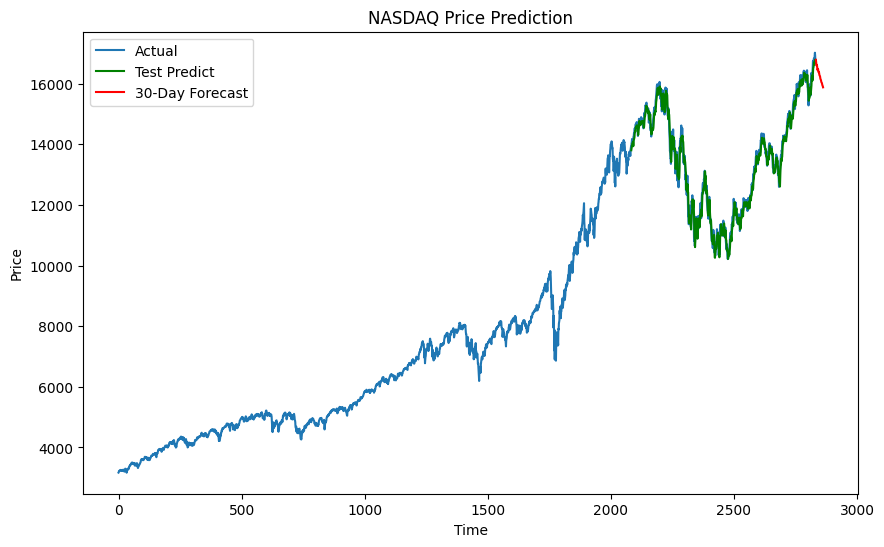

In [28]:
# Plot Results with Train and Test Predictions

plt.figure(figsize=(10, 6))

# Plot entire dataset
plt.plot(scaler.inverse_transform(df1), label='Actual')

# Plot training predictions
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Plot test predictions
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(test_predict_plot, label='Test Predict', color='green')

# Plot 30-day forecast
forecast_days = 30
forecast_output = scaler.inverse_transform(lst_output)
plt.plot(np.arange(len(df1), len(df1) + forecast_days), forecast_output, label='30-Day Forecast', color='red')

# Adding legends and labels
plt.title('NASDAQ Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Huber loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss)

# Inverse transform the actual test labels
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print('Testing RMSE:', test_rmse)

# Compute MAE
test_mae = mean_absolute_error(y_test_actual, test_predict)
print('Testing MAE:', test_mae)

# Compute MAPE
test_mape = mean_absolute_percentage_error(y_test_actual, test_predict)
print('Testing MAPE:', test_mape)

# Compute Huber Loss
delta = 1.0  # You can adjust the delta parameter
test_huber_loss = np.mean(huber_loss(y_test_actual, test_predict, delta))
print('Testing Huber Loss:', test_huber_loss)

Testing RMSE: 231.96754087438404
Testing MAE: 189.77781776743993
Testing MAPE: 1.4348816436262553
Testing Huber Loss: 189.27784699897003


## USD

In [30]:
# Load CSV File
df = pd.read_csv('US Dollar Index Futures Historical Data.csv')
print(df)
df.describe()

           Date    Price     Open     High      Low    Vol. Change %
0     5/31/2024  104.627  104.730  104.850  104.310  13.90K   -0.03%
1     5/30/2024  104.658  105.095  105.135  104.575  17.83K   -0.36%
2     5/29/2024  105.034  104.590  105.085  104.515  17.66K    0.47%
3     5/28/2024  104.539  104.490  104.560  104.260  11.02K   -0.09%
4     5/27/2024  104.638  104.645  104.670  104.485   3.09K    0.00%
...         ...      ...      ...      ...      ...     ...      ...
2902   3/7/2013   82.123   82.615   82.620   81.995  35.17K   -0.47%
2903   3/6/2013   82.507   82.020   82.640   81.975  26.04K    0.44%
2904   3/5/2013   82.147   82.210   82.300   81.955  25.02K   -0.13%
2905   3/4/2013   82.255   82.355   82.530   82.230  19.76K   -0.13%
2906   3/1/2013   82.358   82.010   82.580   81.850  34.83K    0.43%

[2907 rows x 7 columns]


,Price,Open,High,Low
count,2907.000000,2907.000000,2907.000000,2907.000000
mean,94.995247,94.988852,95.273136,94.706016
std,7.211426,7.209789,7.262177,7.153702
min,79.126000,79.165000,79.290000,78.930000
25%,92.067000,92.100000,92.317500,91.850000
50%,95.855000,95.835000,96.115000,95.575000
75%,99.419500,99.390000,99.760000,99.120000
max,114.047000,114.105000,114.745000,113.260000


In [32]:
df_reversed = df.iloc[::-1].reset_index(drop=True)
df['Date'] = pd.to_datetime(df_reversed['Date'])
df1 = df_reversed['Price']
df1

0        82.358
1        82.255
2        82.147
3        82.507
4        82.123
         ...   
2902    104.638
2903    104.539
2904    105.034
2905    104.658
2906    104.627
Name: Price, Length: 2907, dtype: float64

In [33]:
# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [34]:
# Split Train and Test Data
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [35]:
# Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [36]:
# Reshape Input to Fit RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
# Define RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\LearnPython\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# Fit Model with Training Data
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0106
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.0013e-04
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3917e-04
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5943e-04
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7254e-04
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0005e-04
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5718e-04
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9421e-04
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4698e-04
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8841e-04
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7922e-04
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7211e-04
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0513e-04
Epoch 15/100
31/31 

In [39]:
# Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [40]:
# Inverse Transform Predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
# Forecast Next 30 Days
last_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(last_input)
temp_input = temp_input[0].tolist()

lst_output = []
i = 0
while i < 30:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = last_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [42]:
# Assuming 'lst_output' contains your 30-day forecast
forecast_days = 30
forecast_output = scaler.inverse_transform(lst_output)

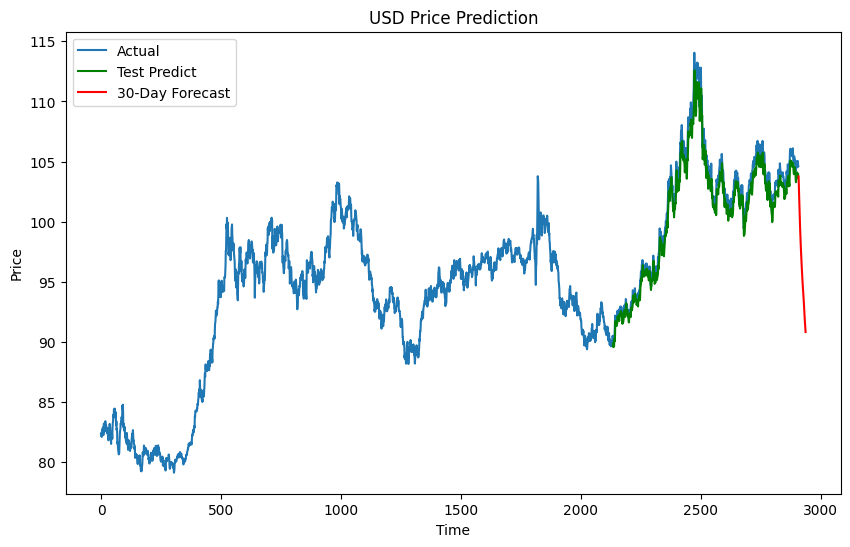

In [43]:
# Plot Results with Train and Test Predictions

plt.figure(figsize=(10, 6))

# Plot entire dataset
plt.plot(scaler.inverse_transform(df1), label='Actual')

# Plot training predictions
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Plot test predictions
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(df1) - 1, :] = test_predict
plt.plot(test_predict_plot, label='Test Predict', color='green')

# Plot 30-day forecast
forecast_days = 30
forecast_output = scaler.inverse_transform(lst_output)
plt.plot(np.arange(len(df1), len(df1) + forecast_days), forecast_output, label='30-Day Forecast', color='red')

# Adding legends and labels
plt.title('USD Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Huber loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss)

# Inverse transform the actual test labels
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print('Testing RMSE:', test_rmse)

# Compute MAE
test_mae = mean_absolute_error(y_test_actual, test_predict)
print('Testing MAE:', test_mae)

# Compute MAPE
test_mape = mean_absolute_percentage_error(y_test_actual, test_predict)
print('Testing MAPE:', test_mape)

# Compute Huber Loss
delta = 1.0  # You can adjust the delta parameter
test_huber_loss = np.mean(huber_loss(y_test_actual, test_predict, delta))
print('Testing Huber Loss:', test_huber_loss)

Testing RMSE: 0.9671168633462498
Testing MAE: 0.8259092283891274
Testing MAPE: 0.8011587284388969
Testing Huber Loss: 0.4175037085121726
